In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("./U.S._Chronic_Disease_Indicators.csv")
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,NaN,%,Crude Prevalence,...,DIS,DIS01,NaN,CRDPREV,AGE,AGE65P,NaN,NaN,NaN,NaN
1,2019,2019,GU,Guam,BRFSS,Arthritis,Arthritis among adults,NaN,%,Crude Prevalence,...,ART,ART01,NaN,CRDPREV,SEX,SEXF,NaN,NaN,NaN,NaN
2,2019,2019,GU,Guam,BRFSS,Immunization,Influenza vaccination among adults,NaN,%,Crude Prevalence,...,IMM,IMM01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
3,2019,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
4,2019,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,NaN,Years,Number,...,HEA,HEA06,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311745 entries, 0 to 311744
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  311745 non-null  int64  
 1   YearEnd                    311745 non-null  int64  
 2   LocationAbbr               311745 non-null  object 
 3   LocationDesc               311745 non-null  object 
 4   DataSource                 311745 non-null  object 
 5   Topic                      311745 non-null  object 
 6   Question                   311745 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              311745 non-null  object 
 9   DataValueType              311745 non-null  object 
 10  DataValue                  210684 non-null  float64
 11  DataValueAlt               210684 non-null  float64
 12  DataValueFootnoteSymbol    102758 non-null  object 
 13  DataValueFootnote          10

Here, we drop the columns where all values are null. In total there are 10 of them.

In [4]:
data = data.drop(columns=["Response", "StratificationCategory2", "Stratification2", "StratificationCategory3", "Stratification3",
                          "ResponseID", "StratificationCategoryID2", "StratificationID2", "StratificationCategoryID3", "StratificationID3"])

In [5]:
data

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2019,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,44.0,...,47.1,Age,Age >=65,POINT (-83.62758034599966 32.83968109300048),13,DIS,DIS01,CRDPREV,AGE,AGE65P
1,2019,2019,GU,Guam,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,15.9,...,18.9,Sex,Female,POINT (144.793731 13.444304),66,ART,ART01,CRDPREV,SEX,SEXF
2,2019,2019,GU,Guam,BRFSS,Immunization,Influenza vaccination among adults,%,Crude Prevalence,30.0,...,34.0,Sex,Male,POINT (144.793731 13.444304),66,IMM,IMM01,CRDPREV,SEX,SEXM
3,2019,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,11.4,...,12.7,Sex,Male,POINT (-68.98503133599962 45.254228894000505),23,DIA,DIA01,CRDPREV,SEX,SEXM
4,2019,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,Years,Number,78.0,...,78.2,Overall,Overall,POINT (-117.07184056399967 39.493240390000494),32,HEA,HEA06,NMBR,OVERALL,OVR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311740,2022,2022,VA,Virginia,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults,%,Age-adjusted Prevalence,31.6,...,40.0,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-78.45789046299967 37.54268067400045),51,NPAW,NPW14,AGEADJPREV,RACE,MRC
311741,2022,2022,WA,Washington,BRFSS,Sleep,Short sleep duration among adults,%,Crude Prevalence,25.3,...,26.6,Age,Age >=65,POINT (-120.47001078999972 47.52227862900048),53,SLEP,SLP03,CRDPREV,AGE,AGE65P
311742,2022,2022,UT,Utah,BRFSS,Immunization,Pneumococcal vaccination among adults aged 65 ...,%,Crude Prevalence,NaN,...,NaN,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-111.58713063499971 39.360700171000474),49,IMM,IMM04,CRDPREV,RACE,AIAN
311743,2022,2022,VI,Virgin Islands,BRFSS,Mental Health,Frequent mental distress among adults,%,Crude Prevalence,8.3,...,14.5,Sex,Male,POINT (-64.896335 18.335765),78,MEN,MEN05,CRDPREV,SEX,SEXM


In [6]:
null_perceentages = data.isna().sum().sort_values(ascending=False) / len(data) * 100
null_perceentages

DataValueFootnote            67.037803
DataValueFootnoteSymbol      67.037803
LowConfidenceLimit           38.933102
HighConfidenceLimit          38.931499
DataValue                    32.417842
DataValueAlt                 32.417842
Geolocation                   1.863382
StratificationCategoryID1     0.000000
DataValueTypeID               0.000000
QuestionID                    0.000000
TopicID                       0.000000
LocationID                    0.000000
Stratification1               0.000000
StratificationCategory1       0.000000
YearStart                     0.000000
YearEnd                       0.000000
DataValueType                 0.000000
DataValueUnit                 0.000000
Question                      0.000000
Topic                         0.000000
DataSource                    0.000000
LocationDesc                  0.000000
LocationAbbr                  0.000000
StratificationID1             0.000000
dtype: float64

<Axes: title={'center': 'Percentage of Null Values:'}>

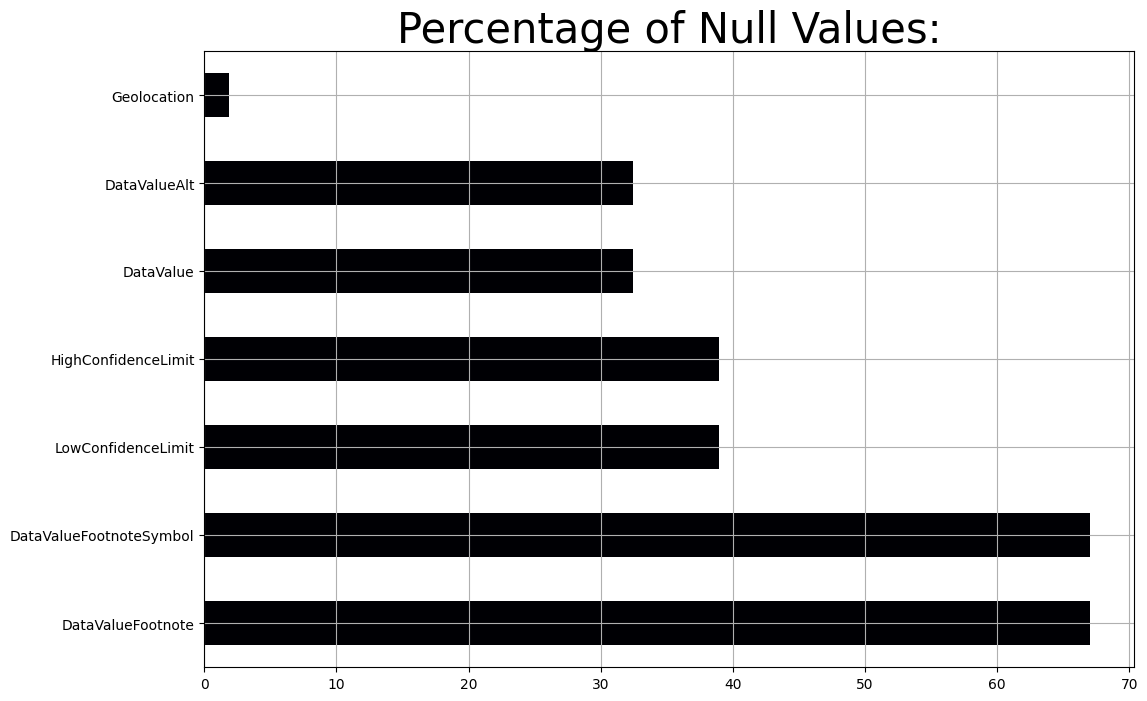

In [7]:
plt.title("Percentage of Null Values:" , fontsize=30)
null_perceentages[null_perceentages != 0].plot(figsize=(12,8),kind='barh',grid=True,cmap='inferno')

In [37]:
mental_health_related_topics = data[data['Topic'].str.contains("Mental Health", case=False, na=False)]

unique_topics = mental_health_related_topics['Topic'].unique()
unique_questions = mental_health_related_topics['Question'].unique()

unique_questions


array(['Depression among adults', 'Frequent mental distress among adults',
       'Average mentally unhealthy days among adults',
       'Postpartum depressive symptoms among women with a recent live birth',
       'Current poor mental health among high school students'],
      dtype=object)

/var/folders/81/bppggn2x13gggn8pc221q_0r0000gn/T/ipykernel_2318/1948813274.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DataValue'] = pd.to_numeric(filtered_data['DataValue'])


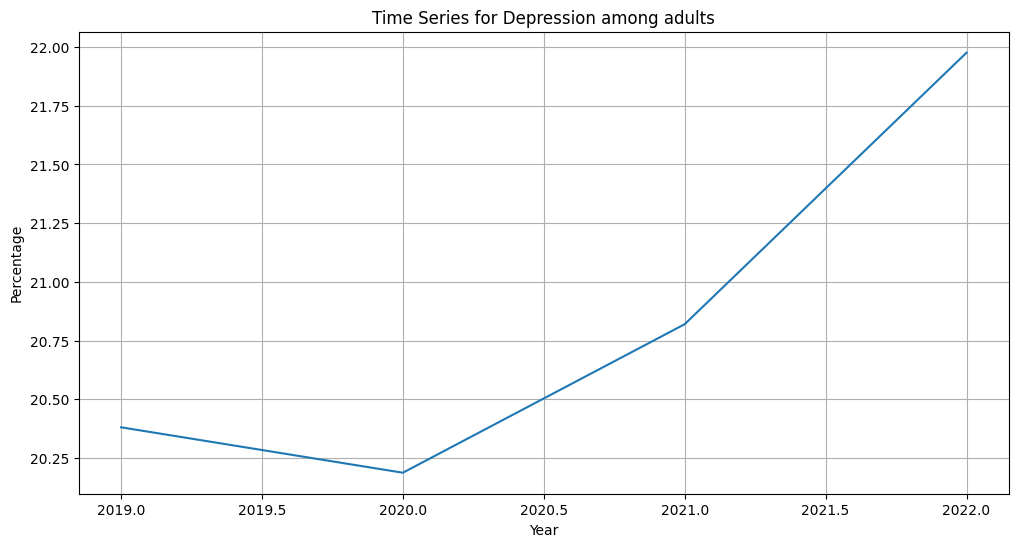

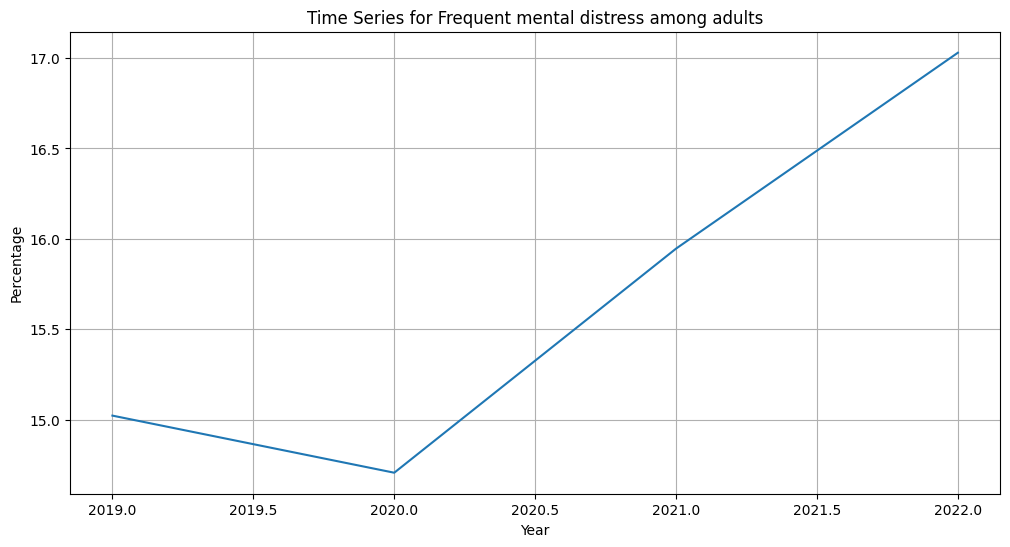

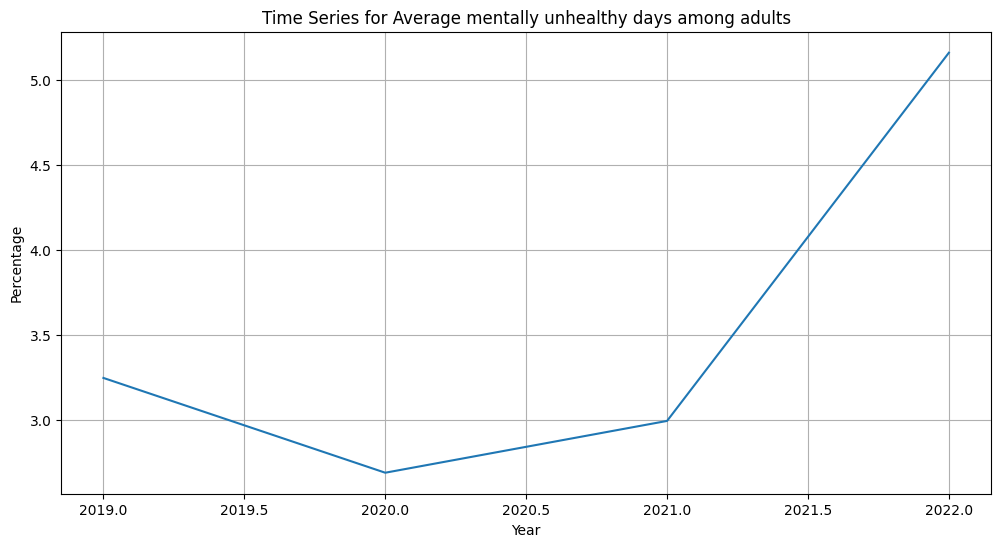

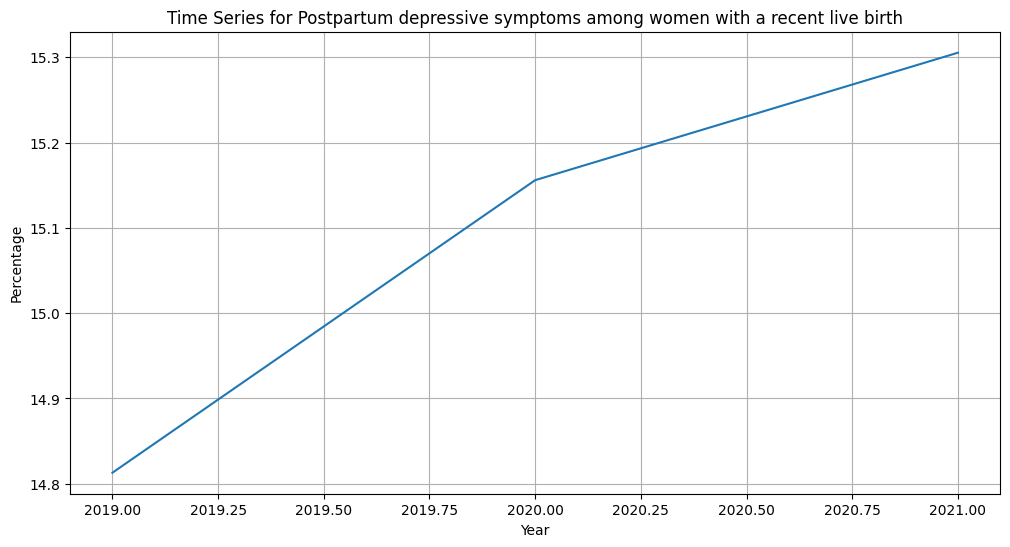

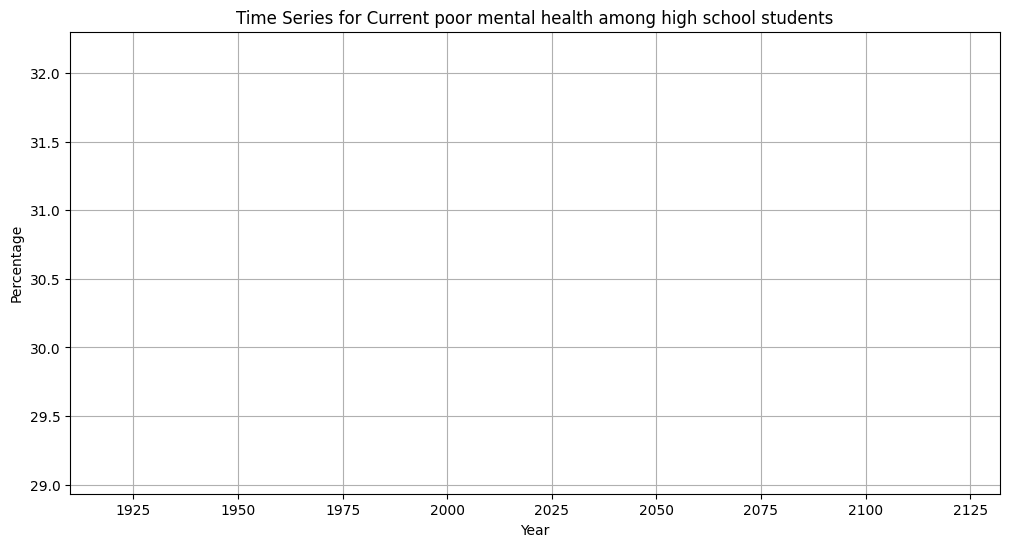

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot time series for each question
def plot_time_series(data, question, title):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x='YearStart', y='DataValue', estimator='mean', errorbar=None)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.grid(True)
    plt.show()

# Filter data for only relevant columns and drop NaNs in 'DataValue' for accurate plotting
filtered_data = mental_health_related_topics[['YearStart', 'DataValue', 'Question']]
filtered_data['DataValue'] = pd.to_numeric(filtered_data['DataValue'])
filtered_data = filtered_data.dropna(subset=['DataValue'])

# Plotting time series for each question
for question in unique_questions:
    specific_data = filtered_data[filtered_data['Question'] == question]
    plot_time_series(specific_data, question, f'Time Series for {question}')


Why is there no plots for mental health among high school students?

In [43]:
hs = mental_health_related_topics[mental_health_related_topics.Question == "Current poor mental health among high school students"]
np.unique(hs.YearStart)


array([2021])

In [47]:
hs

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
171500,2021,2021,AZ,Arizona,YRBSS,Mental Health,Current poor mental health among high school s...,%,Crude Prevalence,34.1,...,41.6,Grade,Grade 10,POINT (-111.76381127699972 34.865970280000454),4,MEN,MEN01,CRDPREV,GRADE,GRD10
171856,2021,2021,AR,Arkansas,YRBSS,Mental Health,Current poor mental health among high school s...,%,Crude Prevalence,30.9,...,46.1,Grade,Grade 11,POINT (-92.27449074299966 34.74865012400045),5,MEN,MEN01,CRDPREV,GRADE,GRD11
172067,2021,2021,AL,Alabama,YRBSS,Mental Health,Current poor mental health among high school s...,%,Crude Prevalence,40.5,...,47.6,Sex,Female,POINT (-86.63186076199969 32.84057112200048),1,MEN,MEN01,CRDPREV,SEX,SEXF
172307,2021,2021,AL,Alabama,YRBSS,Mental Health,Current poor mental health among high school s...,%,Crude Prevalence,21.9,...,33.5,Grade,Grade 10,POINT (-86.63186076199969 32.84057112200048),1,MEN,MEN01,CRDPREV,GRADE,GRD10
172351,2021,2021,AZ,Arizona,YRBSS,Mental Health,Current poor mental health among high school s...,%,Crude Prevalence,35.9,...,39.2,Overall,Overall,POINT (-111.76381127699972 34.865970280000454),4,MEN,MEN01,CRDPREV,OVERALL,OVR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272599,2021,2021,WY,Wyoming,YRBSS,Mental Health,Current poor mental health among high school s...,%,Crude Prevalence,NaN,...,NaN,Grade,Grade 11,POINT (-108.10983035299967 43.23554134300048),56,MEN,MEN01,CRDPREV,GRADE,GRD11
272876,2021,2021,WY,Wyoming,YRBSS,Mental Health,Current poor mental health among high school s...,%,Crude Prevalence,NaN,...,NaN,Sex,Female,POINT (-108.10983035299967 43.23554134300048),56,MEN,MEN01,CRDPREV,SEX,SEXF
274889,2021,2021,WY,Wyoming,YRBSS,Mental Health,Current poor mental health among high school s...,%,Crude Prevalence,NaN,...,NaN,Sex,Male,POINT (-108.10983035299967 43.23554134300048),56,MEN,MEN01,CRDPREV,SEX,SEXM
275330,2021,2021,WY,Wyoming,YRBSS,Mental Health,Current poor mental health among high school s...,%,Crude Prevalence,NaN,...,NaN,Race/Ethnicity,"Asian, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,MEN,MEN01,CRDPREV,RACE,ASN


In [46]:
hs.DataValue.describe()

count    424.000000
mean      30.617925
std        7.467630
min        8.100000
25%       26.475000
50%       30.900000
75%       34.125000
max       66.800000
Name: DataValue, dtype: float64

Conclusion: Not enough data to make a time series.

Something interesting about current dataset; dip in poor mental health during 2020. Bias sample? Or something that occured? Let's check

In [48]:
yearly_sample_count = data.groupby('YearStart').size()
yearly_sample_count

YearStart
2015     8760
2016     8760
2018     2678
2019    88823
2020    67999
2021    87600
2022    47125
dtype: int64

We see that there seems to be no underrepresentation, implying that indeed whatever happened during 2020 had some effect.

### Follow Up Quesitons

1. Can we predict depression among adults given stratification, location, predictors, etc.? Predicting state depression percentages with NN.
2. 



In [8]:
np.unique(data["Topic"])

array(['Alcohol', 'Arthritis', 'Asthma', 'Cancer',
       'Cardiovascular Disease', 'Chronic Kidney Disease',
       'Chronic Obstructive Pulmonary Disease',
       'Cognitive Health and Caregiving', 'Diabetes', 'Disability',
       'Health Status', 'Immunization', 'Maternal Health',
       'Mental Health', 'Nutrition, Physical Activity, and Weight Status',
       'Oral Health', 'Sleep', 'Social Determinants of Health', 'Tobacco'],
      dtype=object)

In [9]:
data[data.Topic == 'Social Determinants of Health']

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
13593,2019,2019,AZ,Arizona,BRFSS,Social Determinants of Health,Lack of health insurance among adults aged 18-...,%,Age-adjusted Prevalence,15.4,...,18.0,Sex,Female,POINT (-111.76381127699972 34.865970280000454),4,SDOH,SDH09,AGEADJPREV,SEX,SEXF
13609,2019,2019,AL,Alabama,ACS,Social Determinants of Health,Unemployment rate among people 16 years and ol...,%,Crude Prevalence,4.9,...,5.5,Sex,Male,POINT (-86.63186076199969 32.84057112200048),1,SDOH,SDH08,CRDPREV,SEX,SEXM
13646,2019,2019,AZ,Arizona,ACS,Social Determinants of Health,Unemployment rate among people 16 years and ol...,%,Crude Prevalence,1.5,...,2.4,Race/Ethnicity,"Asian, non-Hispanic",POINT (-111.76381127699972 34.865970280000454),4,SDOH,SDH08,CRDPREV,RACE,ASN
13662,2019,2019,AK,Alaska,BRFSS,Social Determinants of Health,Routine checkup within the past year among adults,%,Age-adjusted Prevalence,76.1,...,85.0,Race/Ethnicity,Hispanic,POINT (-147.72205903599973 64.84507995700051),2,SDOH,SDH12,AGEADJPREV,RACE,HIS
13758,2019,2019,AK,Alaska,ACS,Social Determinants of Health,Unemployment rate among people 16 years and ol...,%,Crude Prevalence,4.8,...,6.4,Sex,Male,POINT (-147.72205903599973 64.84507995700051),2,SDOH,SDH08,CRDPREV,SEX,SEXM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311693,2022,2022,VT,Vermont,BRFSS,Social Determinants of Health,Lack of reliable transportation in the past 12...,%,Crude Prevalence,5.5,...,6.4,Race/Ethnicity,"White, non-Hispanic",POINT (-72.51764079099962 43.62538123900049),50,SDOH,SDH06,CRDPREV,RACE,WHT
311699,2022,2022,WY,Wyoming,BRFSS,Social Determinants of Health,Routine checkup within the past year among adults,%,Crude Prevalence,NaN,...,NaN,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,SDOH,SDH12,CRDPREV,RACE,MRC
311714,2022,2022,US,United States,BRFSS,Social Determinants of Health,Lack of reliable transportation in the past 12...,%,Age-adjusted Prevalence,5.2,...,6.6,Race/Ethnicity,"Asian, non-Hispanic",NaN,59,SDOH,SDH06,AGEADJPREV,RACE,ASN
311719,2022,2022,WV,West Virginia,BRFSS,Social Determinants of Health,Routine checkup within the past year among adults,%,Age-adjusted Prevalence,NaN,...,NaN,Race/Ethnicity,"Asian, non-Hispanic",POINT (-80.71264013499967 38.66551020200046),54,SDOH,SDH12,AGEADJPREV,RACE,ASN
